In [59]:
#Analise de dados Instituições de Ensino Superior Público
#pelo Inep
#Utilizamos Gráfico de barras para mostrar
#a quantidade de instituições pelas regiões do Brasil
#Evidenciar qual região possui mais instituições
#Rodrigo Rosa

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')

df = pd.read_csv("C:/Número de IES.csv", sep= ';', low_memory=False )

In [60]:
print(df.head(65))

    Ano_Censo  Número_de_Instituições         Abrangência        Região  \
0        2017                     240        CENTRO-OESTE  CENTRO-OESTE   
1        2017                      64    DISTRITO FEDERAL  CENTRO-OESTE   
2        2017                      89               GOIÁS  CENTRO-OESTE   
3        2017                      59         MATO GROSSO  CENTRO-OESTE   
4        2017                      28  MATO GROSSO DO SUL  CENTRO-OESTE   
..        ...                     ...                 ...           ...   
60       2016                     405                 SUL           SUL   
61       2016                     189              PARANÁ           SUL   
62       2016                     122   RIO GRANDE DO SUL           SUL   
63       2016                      94      SANTA CATARINA           SUL   
64       2015                     235        CENTRO-OESTE  CENTRO-OESTE   

                    UF  
0                  NaN  
1     DISTRITO FEDERAL  
2                GOIÁS  

In [61]:
print(df.describe())

         Ano_Censo  Número_de_Instituições
count   128.000000              128.000000
mean   2015.500000              149.796875
std       1.122427              225.192703
min    2014.000000                7.000000
25%    2014.750000               28.750000
50%    2015.500000               61.000000
75%    2016.250000              140.750000
max    2017.000000             1126.000000


In [62]:
df['Região'].value_counts()

NORDESTE        40
NORTE           32
CENTRO-OESTE    20
SUDESTE         20
SUL             16
Name: Região, dtype: int64

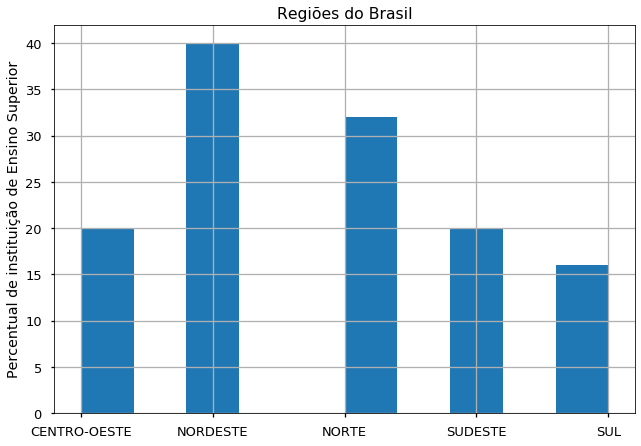

In [63]:
#Gerando Grafico de barras
df.Região.hist(bins = 10)
plt.ylabel("Percentual de instituição de Ensino Superior")
plt.title("Regiões do Brasil")
plt.show()

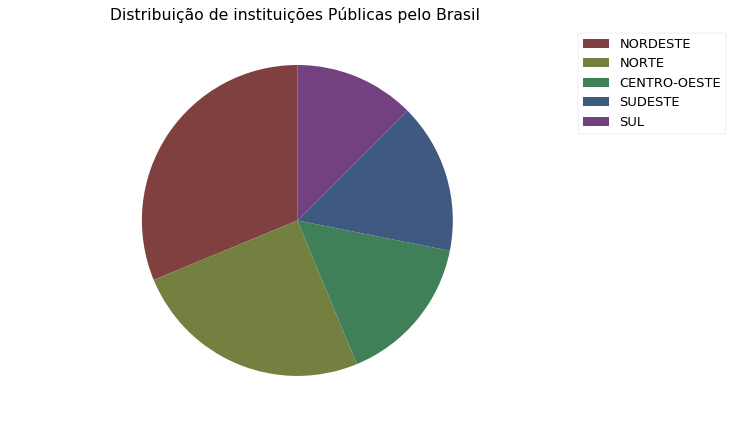

In [86]:
#Definindo a quantidae
num = len(df.Região.value_counts().index)

#criando a lista de cores 
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.Região.value_counts().index
colors = ['orange','OrangeRed', 'DarkCyan', 'Maroon', 'DimGray']

#Grafico de pizza
fatias, texto = plt.pie(df.Região.value_counts(),
                       colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Distribuição de instituições Públicas pelo Brasil ") 
plt.show()


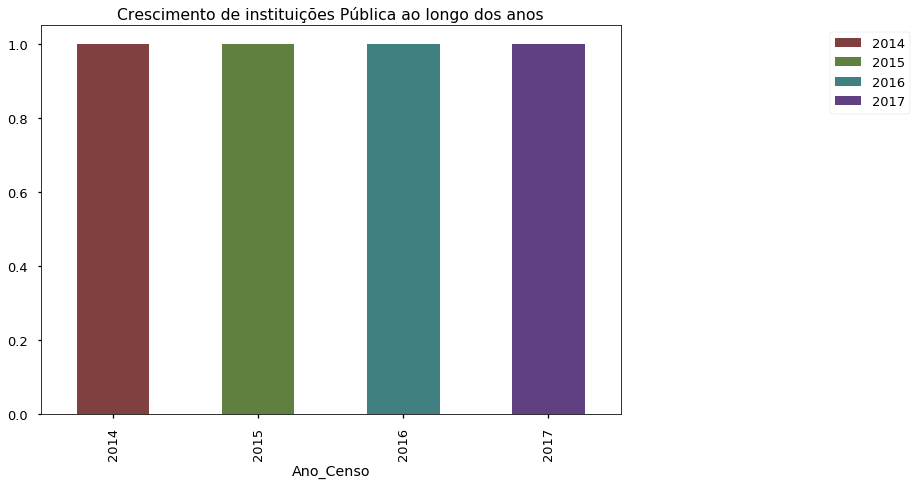

In [87]:
#Agrupando os dados 
df_Ano_Censo = df.copy()
bins=[0, 20, 30, 40, 50, 60]
df_Ano_Censo['Ano_CensoRanges'] = pd.cut(df_Ano_Censo['Ano_Censo'], bins,
                                        labels = ["0","2014","2015","2016","2017"])
df2 = pd.crosstab(df_Ano_Censo.Ano_Censo,
                 df_Ano_Censo.Ano_Censo).apply(lambda r: r/r.sum(), axis=1)
#Definindo a quantidade
num = len(df_Ano_Censo.Ano_Censo.value_counts().index)

#criando a lista de cores
listaHSV = [(x*1.0/num, 0.5,0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x),listaHSV))

#Grafico de barras
ax1 = df2.plot(kind = "bar", stacked= True,
              color = listaRGB, title = "Crescimento de instituições Pública ao longo dos anos")
lines, labels = ax1. get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))


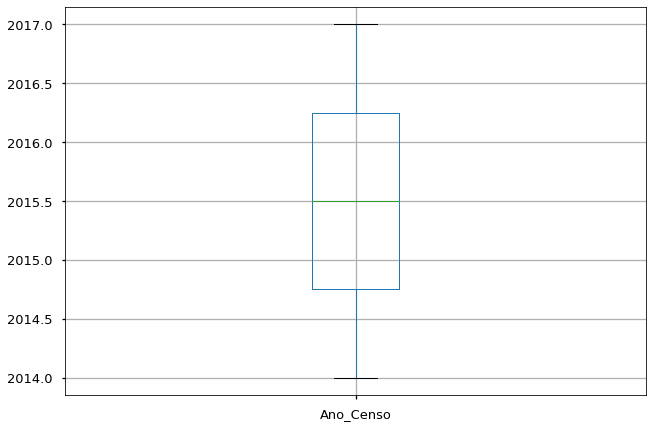

In [70]:
df.boxplot(column='Ano_Censo')